In [116]:
%pylab inline
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


c:\users\nico.-\appdata\local\programs\python\python38\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['histogram']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [117]:
file_name = 'uber-raw-data-apr14.csv'
data = pd.read_csv(file_name)
print(data.shape)
data.head()

(564516, 4)


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [118]:
data.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [119]:
# data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [120]:
dt = '4/1/2014 0:11:00'

In [121]:
d, t = dt.split(' ') # esta es una forma de asignar valores a las variables que todavia no conocia!

In [122]:
d

'4/1/2014'

In [123]:
t

'0:11:00'

In [124]:
dt.split(' ')[0] == d

True

In [125]:
d, m, y = d.split('/')
print(d)
print(m)
print(y)

4
1
2014


In [126]:
type(y)

str

In [127]:
int(y)

2014

In [128]:
print(type(y))

<class 'str'>


In [129]:
dt

'4/1/2014 0:11:00'

In [130]:
print(type(dt))
dt = pd.to_datetime(dt)
print(type(dt))
print(dt)

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-04-01 00:11:00


In [131]:
dt

Timestamp('2014-04-01 00:11:00')

In [132]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime) 

In [133]:
data.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [134]:
def  get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)
data

,Date/Time,Lat,Lon,Base,dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1
...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30


In [135]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

In [136]:
def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)


In [137]:
data

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0
...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23


# Data Visualization

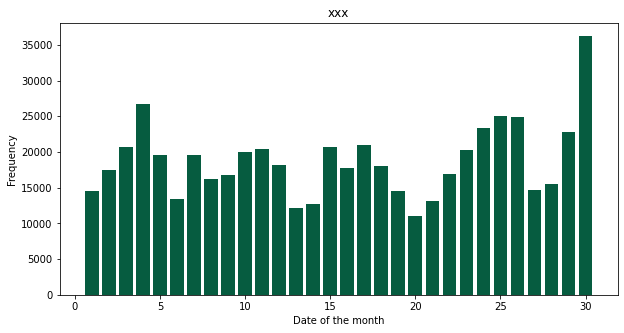

In [138]:
fig, ax = plt.subplots(figsize=(10, 5))


histogram = hist(data.dom,
                bins=30,
                color='#065c40',
                align='mid',
                rwidth=0.8,
                range=(0.5, 30.5))

plt.xlabel('Date of the month')
plt.ylabel('Frequency')
plt.title('xxx')

plt.show()

In [139]:
def count_rows(rows):
    return len(rows)


by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

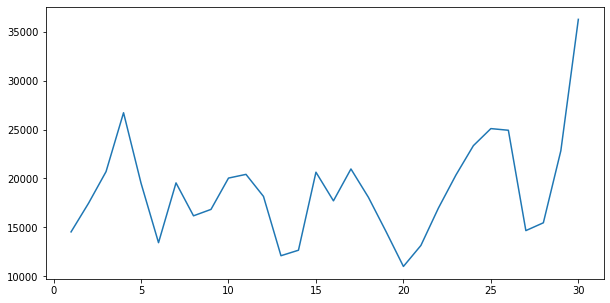

In [140]:
fig, ax = plt.subplots(figsize=(10, 5))

line_plot = plot(by_date)



plt.show()

In [141]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

TypeError: 'tuple' object is not callable

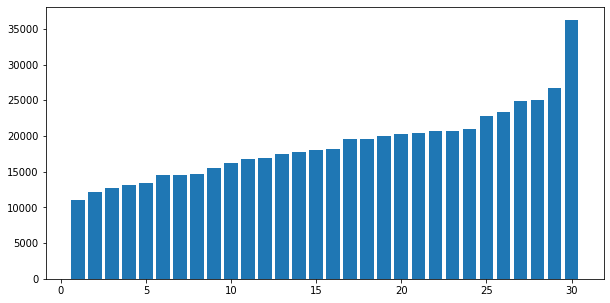

In [142]:
fig, ax = plt.subplots(figsize=(10,5))


bar_plot = bar(range(1,31),by_date_sorted,label='xxx')
plt.xticks(range(1,31), by_date_sorted.index)


plt.legend()


plt.show()

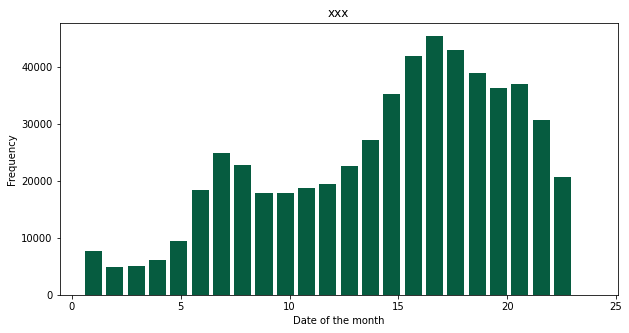

In [143]:
fig, ax = plt.subplots(figsize=(10, 5))


histogram = hist(data['hour'],
                bins=24,
                color='#065c40',
                align='mid',
                rwidth=0.8,
                range=(0.5, 24))

plt.xlabel('Date of the month')
plt.ylabel('Frequency')
plt.title('xxx')

plt.show()

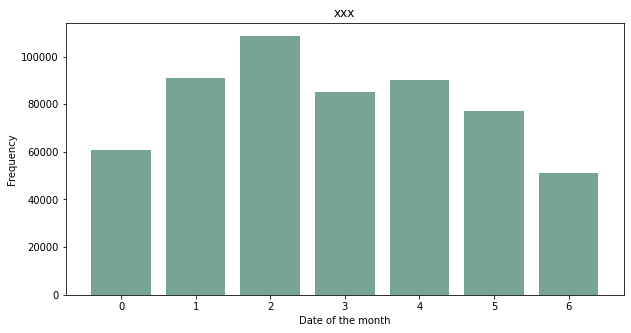

In [144]:
fig, ax = plt.subplots(figsize=(10, 5))


histogram = hist(data['weekday'],
                bins=7,
                color='#065c40',
                align='mid',
                rwidth=0.8,
                range=(-0.5, 6.5),
                alpha=.55)

plt.xticks = (range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())


plt.xlabel('Date of the month')
plt.ylabel('Frequency')
plt.title('xxx')

plt.show()

In [145]:
# genial!!! un pasito adelante comprendiendo las posibilidades que da pandas!!!!

by_cross = (data
          .groupby(['weekday', 'hour'])
          .apply(count_rows)
          .unstack()
         )
by_cross

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


Figure has been saved!!


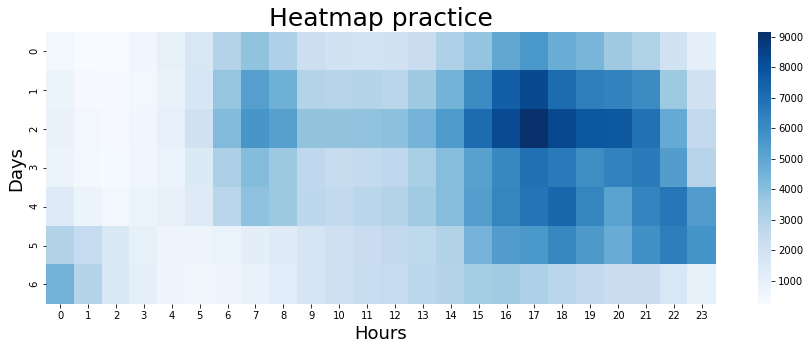

In [146]:
fig, ax = subplots(figsize=(15,5))

sns.heatmap(by_cross,
           cbar=True,
           square=False,
           cmap='Blues',
            )

# Setting title and labels
plt.title('Heatmap practice', fontsize=25)
plt.xlabel('Hours', fontsize=18)
plt.ylabel('Days', fontsize=18)


# save figure
plt.savefig('UBER.png', dpi=200, format='png', bbox_inches='tight')
print('Figure has been saved!!')


plt.show()

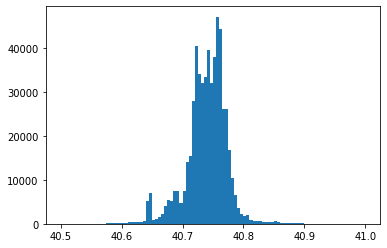

In [147]:
hist(data['Lat'],
     bins=100,
    range=(40.5, 41))
plt.show()

In [148]:
data.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dom                   int64
weekday               int64
hour                  int64
dtype: object

(1.0, 100.0)

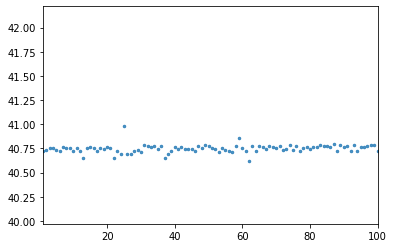

In [149]:
plot(data['Lat'], '.', ms=5, alpha=0.8)
xlim(1,100)

Figure has been saved!!


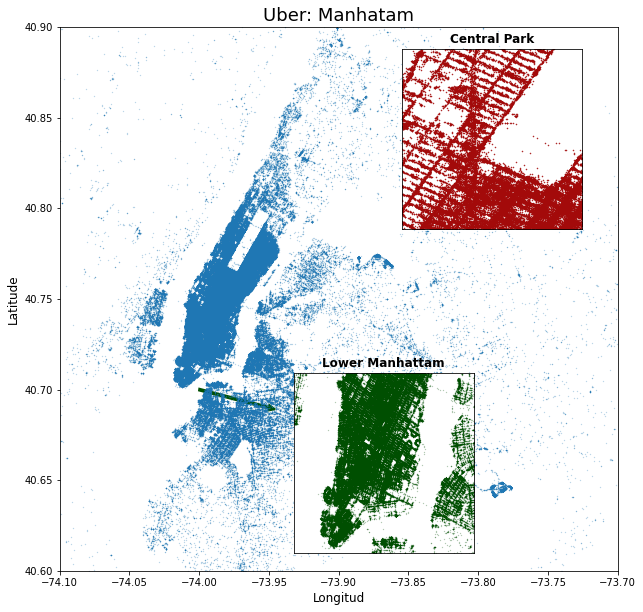

In [170]:
fig, ax = subplots(figsize=(10,10))
# definimos un dot plot como grfico principal
dot_plot = plot(data['Lon'],
                data['Lat'],
                '.',
                ms=.5,
                alpha=.5
               )
# modificamos el fondo del grafico principal
ax.set_facecolor("white")

# definimos los limites x e y del grafico
plt.xlim(-74.1, -73.7)
plt.ylim(40.6, 40.9)

# definimos nombers y propiedades de los ejes
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Uber: Manhatam', fontsize=18)

plt.arrow(-74.00, 40.70, 0.05, -0.01,
         color='#004f01',
         linewidth=2,
         alpha=1
         )

#################################################################################
# second axes
ax_2 = fig.add_axes([0.60,0.60,0.25,0.25])

# definimos un dot plot como grfico principal
dot_plot = plot(data['Lon'],
                data['Lat'],
                'o',
                ms=.5,
                color='#a30a0a'
               )

# definimos los limites x e y del grafico
plt.xlim(-73.99, -73.97)
plt.ylim(40.76, 40.78)

xticks([])
yticks([])

plt.title('Central Park', fontweight='bold')
##################################################################################

# third axes
ax_3 = fig.add_axes([0.45,0.15,0.25,0.25])

# definimos un dot plot como grfico principal
dot_plot = plot(data['Lon'],
                data['Lat'],
                '.',
                ms=.5,
                alpha=.5,
                color='#004f01'
               )

# definimos los limites x e y del grafico
plt.xlim(-74.03, -73.95)
plt.ylim(40.70, 40.75)

xticks([])
yticks([])

plt.title('Lower Manhattam', fontweight='bold')

##################################################################################

# save figure
plt.savefig('UBER_Manhatam.png', dpi=200, format='png', bbox_inches='tight')
print('Figure has been saved!!')

plt.show()

Figure has been saved!!


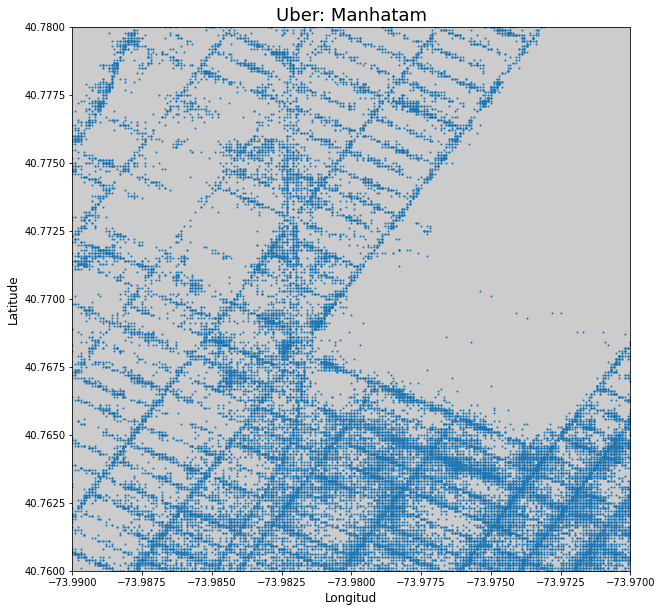

In [151]:
fig, ax = subplots(figsize=(10,10))



# definimos un dot plot como grfico principal
dot_plot = plot(data['Lon'],
                data['Lat'],
                'o',
                ms=1,
                )


# modificamos el fondo del grafico principal
ax.set_facecolor("#cccccc")


# definimos los limites x e y del grafico
plt.xlim(-73.99, -73.97)
plt.ylim(40.76, 40.78)


# definimos nombers y propiedades de los ejes
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Uber: Manhatam', fontsize=18)


# second axes
# sub_axes = plt.axes([-73.8, 40.8, -73.71, 40.89])



# save figure
plt.savefig('UBER_Manhatam_zoom.png', dpi=200, format='png', bbox_inches='tight')
print('Figure has been saved!!')

plt.show()

Figure has been saved!!


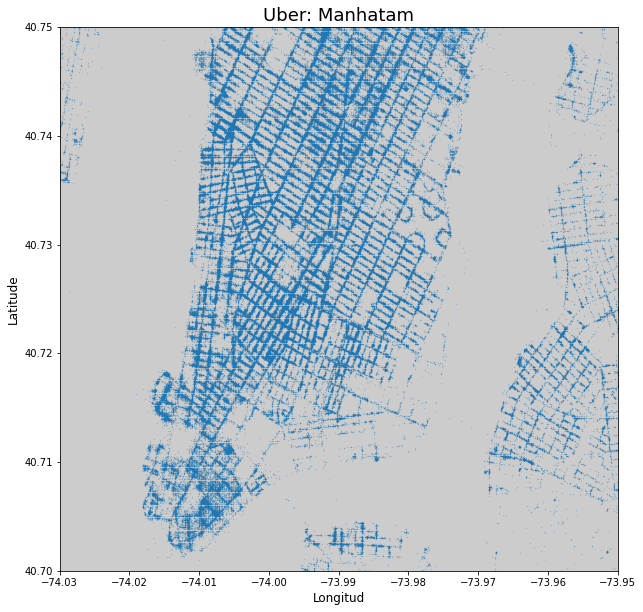

In [152]:
fig, ax = subplots(figsize=(10,10))



# definimos un dot plot como grfico principal
dot_plot = plot(data['Lon'],
                data['Lat'],
                '.',
                ms=.5,
                alpha=.5
               )


# modificamos el fondo del grafico principal
ax.set_facecolor("#cccccc")


# definimos los limites x e y del grafico
plt.xlim(-74.03, -73.95)
plt.ylim(40.70, 40.75)


# definimos nombers y propiedades de los ejes
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Uber: Manhatam', fontsize=18)


# second axes
# sub_axes = plt.axes([-73.8, 40.8, -73.71, 40.89])



# save figure
plt.savefig('UBER_Manhatam_zoom_2.png', dpi=200, format='png', bbox_inches='tight')
print('Figure has been saved!!')

plt.show()